In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random
import time
import os
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data (png files) to numpy arrays
data_path = '../../data/slices_segmentate_png'
csv_path = '../../data/annotations.csv'
data = []
annotations = pd.read_csv(csv_path)

for item in tqdm(annotations.iterrows()):
    image = Image.open(os.path.join(data_path, filename))
    data.append(np.array(image))  

data = np.array(data)

100%|██████████| 3554/3554 [00:04<00:00, 722.49it/s]


In [6]:
# read csv file


In [12]:
annotations.head()
annotations

,pid,dcm_series,uid_slice,x,y,width,height
0,100242,1.2.840.113654.2.55.38995485391900019876570761...,1.2.840.113654.2.55.27516043901205007432317083...,89,158,23,21
1,100242,1.2.840.113654.2.55.38995485391900019876570761...,1.2.840.113654.2.55.98336108916096429974899588...,83,159,26,22
2,100242,1.2.840.113654.2.55.38995485391900019876570761...,1.2.840.113654.2.55.28097281540164891590337477...,72,304,29,27
3,100242,1.2.840.113654.2.55.38995485391900019876570761...,1.2.840.113654.2.55.24791760535415696414038245...,69,297,39,37
4,100242,1.2.840.113654.2.55.38995485391900019876570761...,1.2.840.113654.2.55.23793008515026704674351422...,300,357,35,26
...,...,...,...,...,...,...,...
9275,213544,1.3.6.1.4.1.14519.5.2.1.7009.9004.979854419582...,1.3.6.1.4.1.14519.5.2.1.7009.9004.214373978524...,344,272,33,32
9276,213544,1.3.6.1.4.1.14519.5.2.1.7009.9004.979854419582...,1.3.6.1.4.1.14519.5.2.1.7009.9004.301424642959...,345,272,34,32
9277,213544,1.3.6.1.4.1.14519.5.2.1.7009.9004.979854419582...,1.3.6.1.4.1.14519.5.2.1.7009.9004.804724210742...,345,271,34,33
9278,213544,1.3.6.1.4.1.14519.5.2.1.7009.9004.979854419582...,1.3.6.1.4.1.14519.5.2.1.7009.9004.138795088397...,345,270,34,33


In [11]:
anp

array([[100242,
        '1.2.840.113654.2.55.38995485391900019876570761037952058249',
        '1.2.840.113654.2.55.275160439012050074323170831804208812984',
        ..., 158, 23, 21],
       [100242,
        '1.2.840.113654.2.55.38995485391900019876570761037952058249',
        '1.2.840.113654.2.55.98336108916096429974899588868734477535',
        ..., 159, 26, 22],
       [100242,
        '1.2.840.113654.2.55.38995485391900019876570761037952058249',
        '1.2.840.113654.2.55.280972815401648915903374779039953078123',
        ..., 304, 29, 27],
       ...,
       [213544,
        '1.3.6.1.4.1.14519.5.2.1.7009.9004.979854419582121445438454522940',
        '1.3.6.1.4.1.14519.5.2.1.7009.9004.804724210742103651174088683109',
        ..., 271, 34, 33],
       [213544,
        '1.3.6.1.4.1.14519.5.2.1.7009.9004.979854419582121445438454522940',
        '1.3.6.1.4.1.14519.5.2.1.7009.9004.138795088397222401111710080814',
        ..., 270, 34, 33],
       [213544,
        '1.3.6.1.4.1.14519.5.2.

In [20]:
# show size of data in RAM
print('Data size in RAM:', data.nbytes / 1024**2, 'MB')

Data size in RAM: 888.5 MB


Image shape: (512, 512)


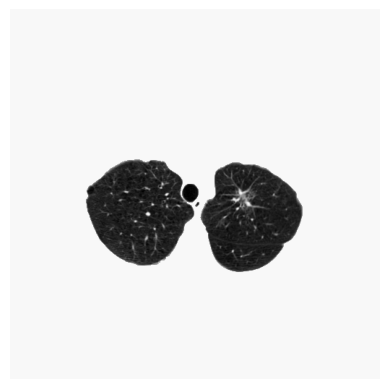

In [24]:
# single element shape
print(f"Image shape: {data[0].shape}")
plt.imshow(data[0], cmap='gray')
plt.axis('off')
plt.show()